In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
params = {}

with open("irs_parameter_info.txt") as f:
    for line in f:
        (key, val) = line.split()
        try:
            params[key] = float(val)
        except:
            params[key] = val

params

{'kappa_tot': 0.449999988,
 'shear': 0.449999988,
 'mu_ave': 9.99999809,
 'smooth_fraction': 0.0,
 'kappa_star': 0.449999988,
 'kappa_star_actual': 0.449999958,
 'theta_e': 1.0,
 'random_seed': 1.0,
 'mass_function': 'equal',
 'm_lower': 1.0,
 'm_upper': 1.0,
 'mean_mass': 1.0,
 'mean_mass2': 1.0,
 'm_lower_actual': 1.0,
 'm_upper_actual': 1.0,
 'mean_mass_actual': 1.0,
 'mean_mass2_actual': 1.0,
 'light_loss': 0.00999999978,
 'num_stars': 23815.0,
 'rad': 230.048309,
 'safety_scale': 1.37,
 'center_y': 20.0,
 'half_length_source': 10.0,
 'num_pixels': 10000.0,
 'mean_rays_per_pixel': 1000.0,
 'half_length_image_x1': 18.022398,
 'half_length_image_x2': 167.116791,
 'ray_sep': 0.00019999998,
 't_ray_shoot': 39.458}

In [3]:
def read_stars(fname):
    with open(fname) as f:
        nstars = np.fromfile(f, dtype=np.int32, count=1)[0]
        rectangular = np.fromfile(f, dtype=np.int32, count=1)[0]
        corner = np.fromfile(f, dtype=np.float32, count=2)
        theta_e = np.fromfile(f, dtype=np.float32, count=1)[0]
        stars = np.fromfile(f, dtype=np.float32)
        stars = stars.reshape(nstars, 3)
    return stars

In [4]:
def read_map(fname):
    with open(fname) as f:
        nrows, ncols = np.fromfile(f, dtype=np.int32, count=2)
        dat = np.fromfile(f, dtype=np.int32)
        dat = dat.reshape(nrows,ncols)
    return dat

In [5]:
stars = read_stars(f'irs_stars.bin')

(23815, 3)


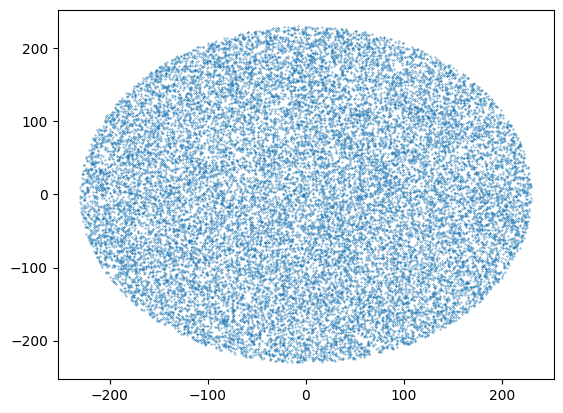

In [6]:
print(stars.shape)
plt.scatter(stars[:, 0], stars[:, 1], s=0.1)
plt.show()

In [7]:
rays = read_map(f'irs_magnifications.bin')
print(np.min(rays))
print(np.max(rays))
print(np.mean(rays))
mags = -2.5*np.log10(rays / params['mean_rays_per_pixel'])
print(np.min(mags))
print(np.max(mags))

166
31720
941.37656649
-3.7533329466139156
1.9497297798998623


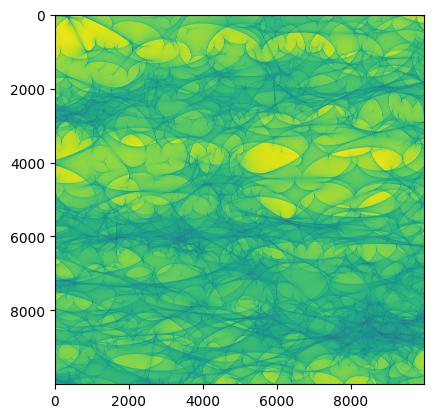

In [8]:
plt.imshow(mags)
plt.show()